# About Dataset
This is a simulated dataset exploring how lifestyle habits affect academic performance in students. With 1,000 synthetic student records and 15+ features including study hours, sleep patterns, social media usage, diet quality, mental health, and final exam scores, it’s perfect for ML projects, regression analysis, clustering, and data viz. Created using realistic patterns for educational practice.

Ever wondered how much Netflix, sleep, or TikTok scrolling affects your grades? 👀 This dataset simulates 1,000 students' daily habits—from study time to mental health—and compares them to final exam scores. It's like spying on your GPA through the lens of lifestyle


In [369]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split ,cross_val_score
from sklearn.metrics import  r2_score,mean_absolute_error,mean_squared_error
from sklearn.pipeline import Pipeline
import os
from sklearn.compose import  ColumnTransformer 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,OrdinalEncoder

# exploring data 


In [370]:
df=pd.read_csv("data/student_habits_performance.csv")

In [371]:
# copying the orignal data 
tempdf=df.copy()


In [372]:
# checking all value category for every columns
for i in tempdf.columns:
    val=tempdf[i].value_counts()
    print(val)

student_id
S1000    1
S1671    1
S1658    1
S1659    1
S1660    1
        ..
S1338    1
S1339    1
S1340    1
S1341    1
S1999    1
Name: count, Length: 1000, dtype: int64
age
20    146
24    134
17    133
21    125
23    119
18    117
19    113
22    113
Name: count, dtype: int64
gender
Female    481
Male      477
Other      42
Name: count, dtype: int64
study_hours_per_day
3.5    38
3.2    36
4.3    35
3.3    34
3.8    31
       ..
7.5     1
8.2     1
7.6     1
0.1     1
7.1     1
Name: count, Length: 78, dtype: int64
social_media_hours
3.1    38
2.9    36
3.2    36
2.2    35
2.1    35
3.0    34
2.4    34
1.9    32
2.3    32
2.8    31
1.8    31
2.0    30
3.3    29
2.5    27
1.4    26
2.7    26
1.7    25
2.6    25
3.6    24
3.5    23
1.5    23
1.6    23
3.4    22
0.0    21
1.2    20
0.9    20
1.3    18
3.8    17
4.0    17
4.3    15
3.7    15
1.1    15
1.0    14
3.9    13
4.2    12
4.5    10
0.7    10
0.8    10
4.6    10
4.9     9
4.1     9
0.2     8
0.6     8
4.7     7
4.4     7
0.3   

In [373]:
tempdf.shape

(1000, 16)

In [374]:
tempdf.info()
print('(note):- parental_education_level  has some missing values')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [375]:
tempdf.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [376]:
# dropping irrelevant columns
tempdf.drop(columns=['student_id'],inplace=True)

# Expoloratory Data Analysis

<Axes: xlabel='age', ylabel='Density'>

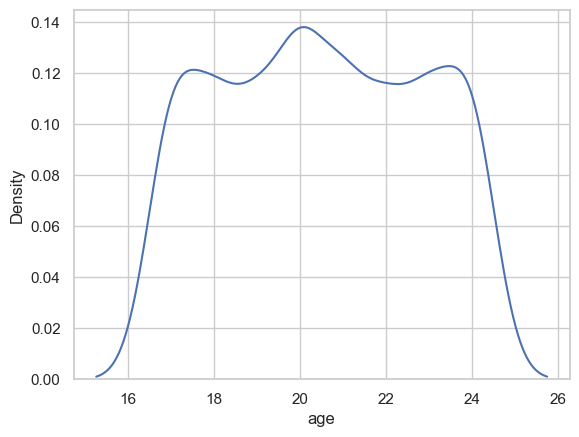

In [377]:
sns.kdeplot(x=tempdf['age'])

<Axes: xlabel='age', ylabel='Count'>

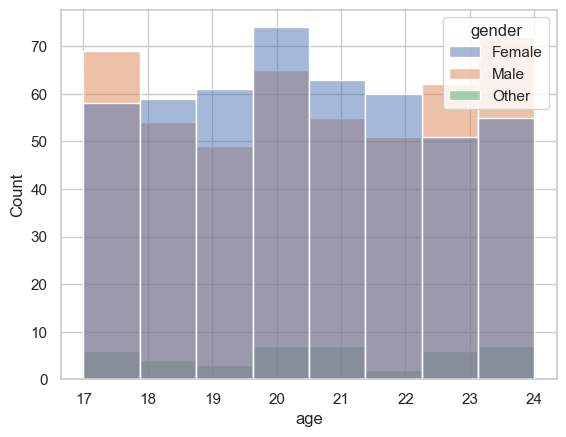

In [378]:
sns.histplot(x=tempdf['age'],bins=8,hue=tempdf['gender'])

<Axes: xlabel='gender', ylabel='Count'>

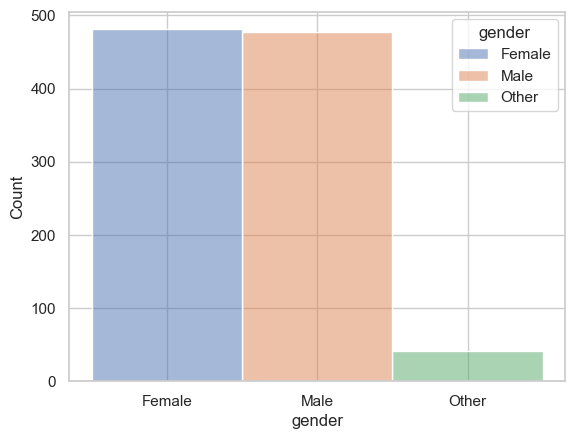

In [379]:
sns.histplot(data=tempdf,x='gender',hue='gender')

<Axes: xlabel='study_hours_per_day', ylabel='Count'>

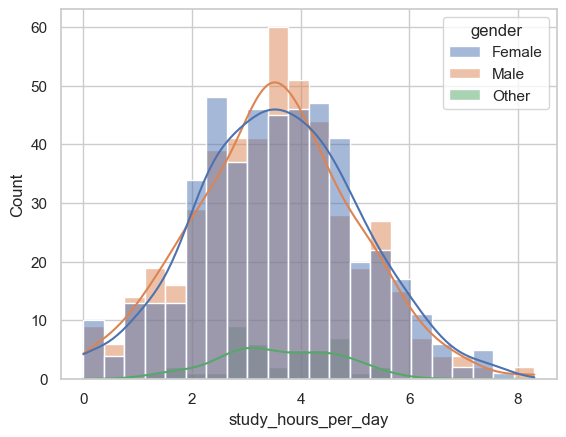

In [380]:
sns.histplot(data=tempdf,x='study_hours_per_day',kde=True,hue='gender')

Text(0.5, 1.0, 'study hours per day relation with exam score ')

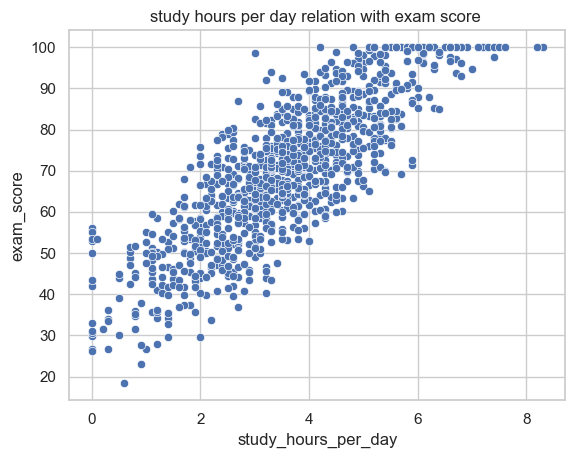

In [381]:
sns.scatterplot(data=tempdf,x='study_hours_per_day',y='exam_score')
plt.title('study hours per day relation with exam score ')

<Axes: xlabel='social_media_hours', ylabel='Count'>

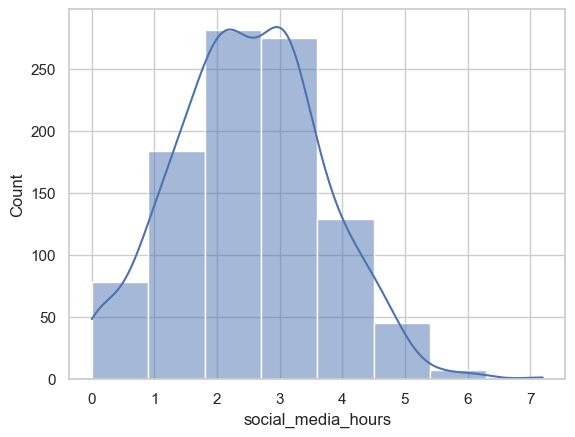

In [382]:
sns.histplot(data=tempdf,x='social_media_hours',bins=8,kde=True)

<Axes: xlabel='part_time_job', ylabel='Count'>

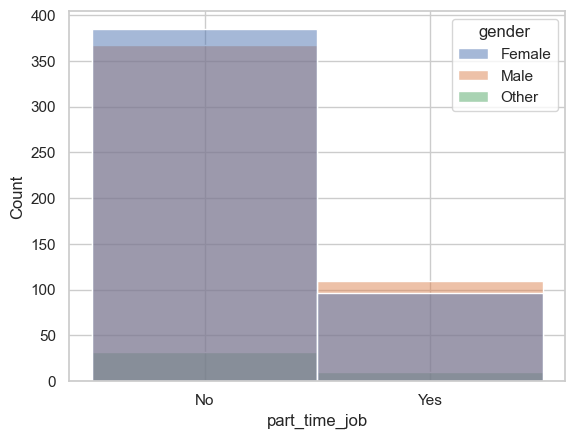

In [383]:
sns.histplot(data=tempdf,x='part_time_job',hue='gender')

Text(0.5, 1.0, 'part_time_job relation with exam score ')

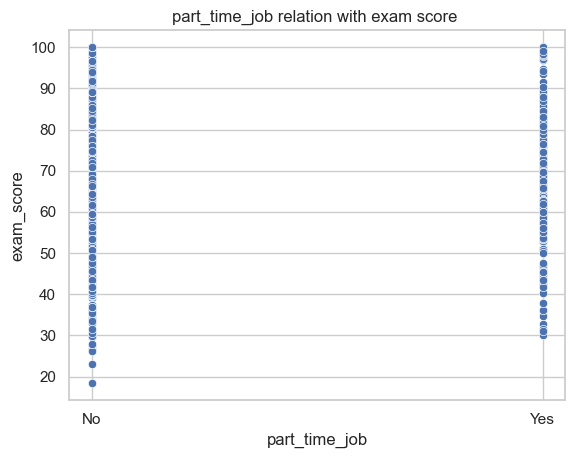

In [384]:
sns.scatterplot(data=tempdf,x='part_time_job',y='exam_score')
plt.title('part_time_job relation with exam score ')

<Axes: xlabel='attendance_percentage', ylabel='Count'>

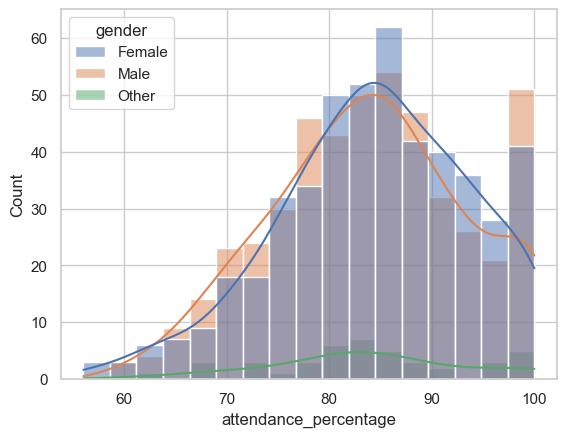

In [385]:
sns.histplot(data=tempdf,x='attendance_percentage',hue='gender',kde=True)


<Axes: xlabel='sleep_hours', ylabel='Count'>

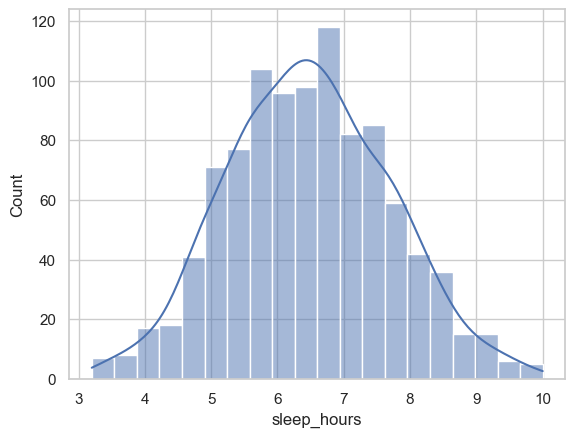

In [386]:
sns.histplot(data=tempdf,x='sleep_hours',kde=True)


Text(0.5, 1.0, 'sleep_hours relation with attendance_percentage')

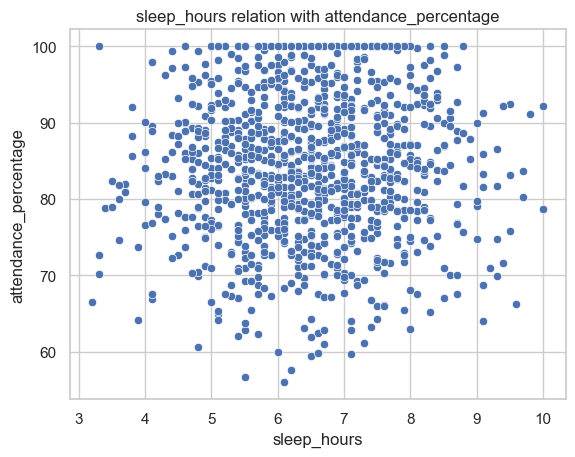

In [387]:
sns.scatterplot(data=tempdf,x='sleep_hours',y='attendance_percentage')
plt.title('sleep_hours relation with attendance_percentage')

<Axes: xlabel='diet_quality', ylabel='Count'>

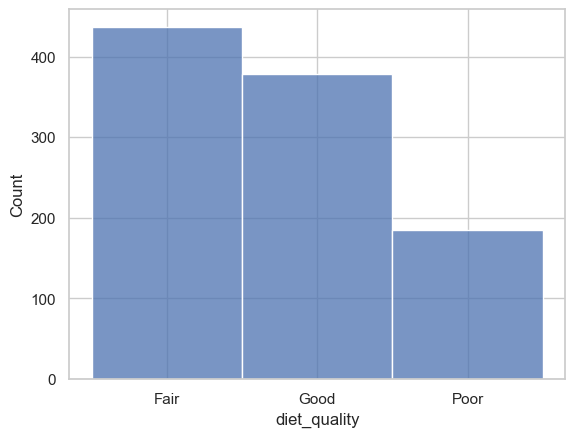

In [388]:
sns.histplot(data=tempdf,x='diet_quality')

<Axes: xlabel='diet_quality'>

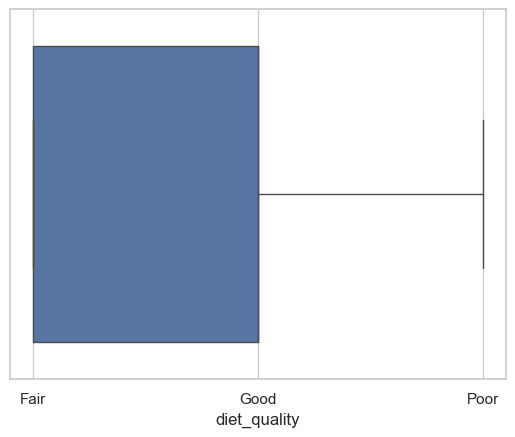

In [389]:
sns.boxplot(data=tempdf,x='diet_quality')

Text(0.5, 1.0, 'sleep_hours relation with diet_quality')

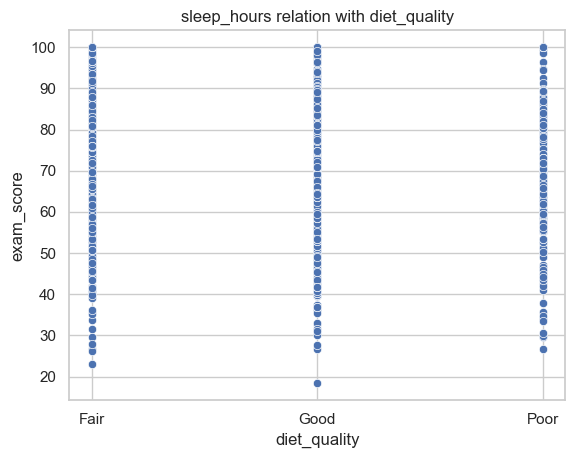

In [390]:
sns.scatterplot(data=tempdf,x='diet_quality',y='exam_score')
plt.title('sleep_hours relation with diet_quality')


<Axes: xlabel='exercise_frequency', ylabel='Count'>

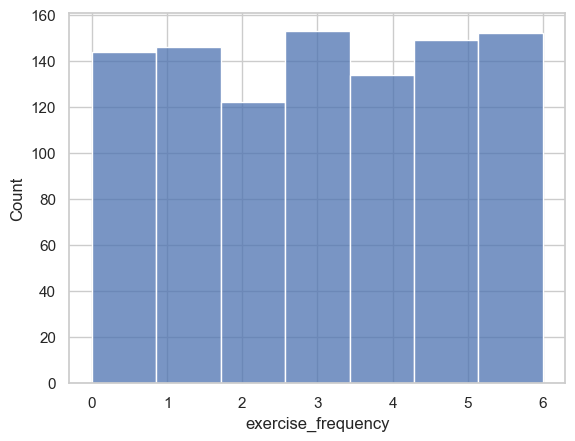

In [391]:
sns.histplot(data=tempdf,x='exercise_frequency',bins=7)


Text(0.5, 1.0, 'exercise_frequency relation with exam_score')

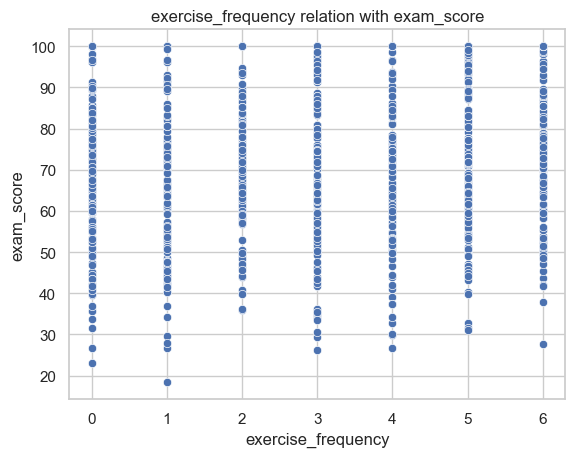

In [392]:
sns.scatterplot(data=tempdf,x='exercise_frequency',y='exam_score')
plt.title('exercise_frequency relation with exam_score')

<Axes: xlabel='parental_education_level', ylabel='Count'>

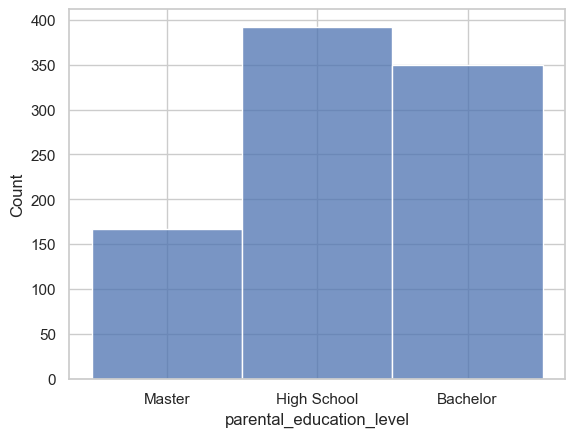

In [393]:
sns.histplot(data=tempdf,x='parental_education_level')

<Axes: xlabel='internet_quality', ylabel='Count'>

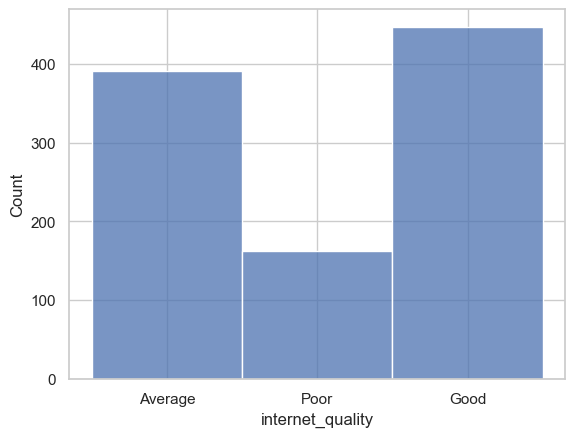

In [394]:
sns.histplot(data=tempdf,x='internet_quality')

Text(0.5, 1.0, 'exercise_frequency relation with exam_score')

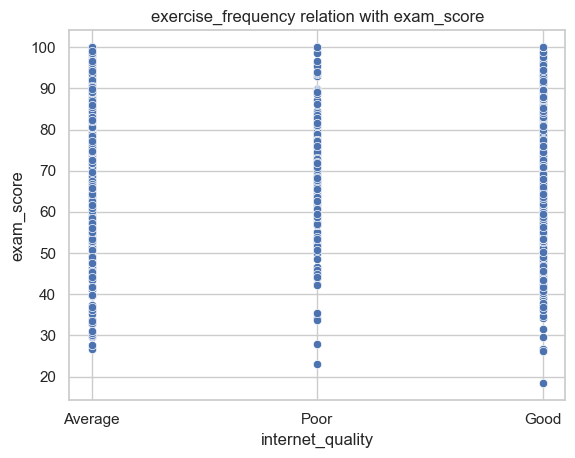

In [395]:
sns.scatterplot(data=tempdf,x='internet_quality',y='exam_score')
plt.title('exercise_frequency relation with exam_score')


<Axes: xlabel='extracurricular_participation', ylabel='Count'>

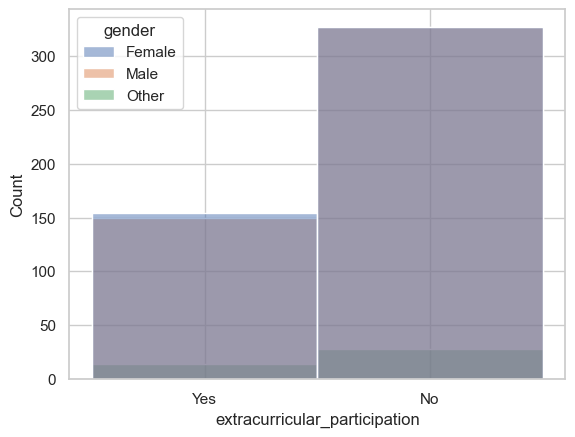

In [396]:
sns.histplot(data=tempdf,x='extracurricular_participation',hue='gender')

<Axes: xlabel='exam_score', ylabel='Density'>

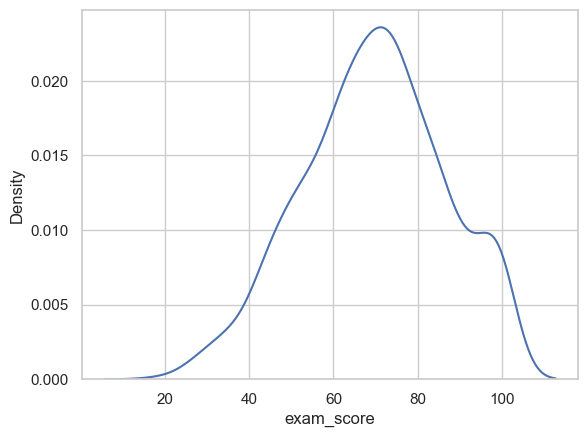

In [397]:
sns.kdeplot(tempdf['exam_score'])

<Axes: >

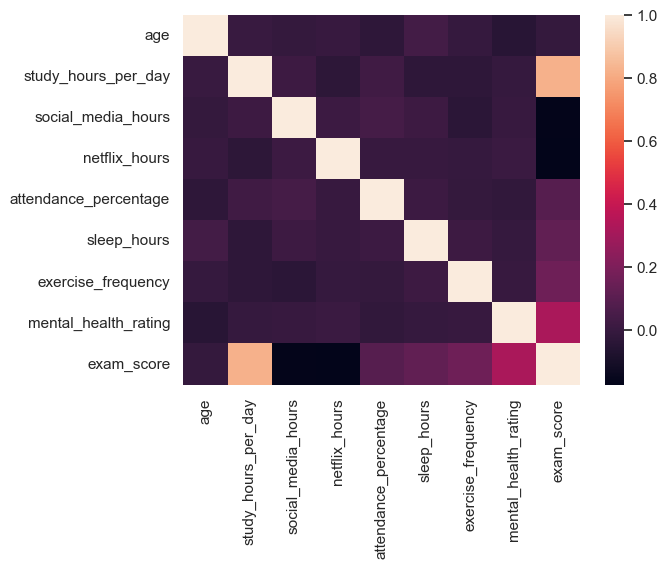

In [398]:
sns.heatmap(numerical_df.corr())

# Preprocessing and Model Training

In [399]:
# seperating X and Y columns
X = tempdf.drop(columns=['exam_score'])
y = tempdf['exam_score']


In [400]:
# splitting training and testing data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [401]:
# making a list of numericals_cols
scaling_features=['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating']

In [402]:
# Define preprocessing pipelines for different column types
# This includes imputing missing values, encoding categorical variables, and scaling numerical features
parental_education_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=[['High School', 'Bachelor', 'Master']]))
])


preprocessing=ColumnTransformer([
    ('parental_edu', parental_education_pipeline, ['parental_education_level']),
    
    ('OHE_Gender',OneHotEncoder(sparse_output=False,handle_unknown='ignore',drop='first'),['gender']),
    ('OHE_part_time_job',OneHotEncoder(sparse_output=False,handle_unknown='ignore',drop='first'),['part_time_job']),
    ('OHE_extracurricular_participation',OneHotEncoder(sparse_output=False,handle_unknown='ignore',drop='first'),['extracurricular_participation']),
    
    ('OE_diet_quality',OrdinalEncoder(categories=[['Poor','Fair','Good']],handle_unknown='error'),['diet_quality']),
    ('OE_internet_quality',OrdinalEncoder(categories=[['Poor','Average','Good']],handle_unknown='error'),['internet_quality']),
    
    ('Scaling_Features',MinMaxScaler(),scaling_features)
])
model=LinearRegression()

In [403]:
pipe = Pipeline([
    ("preprocessing",preprocessing),
    ('model', model)
    ])

In [404]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('parental_edu',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[['High '
                                                                                               'School',
                                                                                               'Bachelor',
                                                                                               'Master']]))]),
                                                  ['parental_education_level']),
                                                 ('OHE_Gender',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gen...
                                                                              'Fair',
                                                                              'Good']]),
                                                  ['diet_quality']),
                                                 ('OE_internet_quality',
                                                  OrdinalEncoder(categories=[['Poor',
                                                                              'Average',
                                                                              'Good']]),
                                                  ['internet_quality']),
                                                 ('Scaling_Features',
                                                  MinMaxScaler(),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating'])])),
                ('model', LinearRegression())])

In [405]:
ypred=pipe.predict(X_test)

In [406]:

print('r2_score',r2_score(y_test,ypred)*100)
print('Mean_Absolute_Error',mean_absolute_error(y_test,ypred))
print('Mean_Squared_Error',mean_squared_error(y_test,ypred))
cv_scores = cross_val_score(pipe, X, y, cv=10, scoring='r2')
print('cross_validation(r2_score):-' , cv_scores)

r2_score 87.90213668906338
Mean_Absolute_Error 4.748163044649221
Mean_Squared_Error 36.5137284303454
cross_validation(r2_score):- [0.89551363 0.88584264 0.9211981  0.90398346 0.87796194 0.89702782
 0.90309168 0.90485898 0.88726457 0.88361176]


## saving trained pipeline using (pickle) for reuse or deployment

In [407]:
import pickle
with open('Acedmic_Performance_Prediction.pkl', 'wb') as f:
    pickle.dump(pipe, f)